In [1]:
import pandas as pd #For Dataframes
import numpy as np #For numerical functioning
from sklearn.decomposition import PCA #Dimensionality Reduction using PCA
import matplotlib.pyplot as plt #For plotting
from sklearn.preprocessing import scale #To do scaling of the data
from sklearn.cluster import KMeans #For clustering on PC's

In [2]:
#Importing dataset
uni = pd.read_csv("Datasets/Universities.csv")
uni.describe()
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
uni_data = uni.iloc[:,1:]

In [4]:
#Scaling the dataset i.e. standardizing the data
uni_normal = scale(uni_data)

In [8]:
uni_normal[:,:]

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [5]:
#Creating Model and fitting it
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [6]:
pca_values.shape

(25, 6)

In [7]:
#Exaplained variance by PCA
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [10]:
#Values of 1st PC
pca.components_[0]

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [11]:
pc1_weights = pca.components_[0]

In [12]:
#Sum of squared for all PC's has to be 1
sum(pc1_weights*pc1_weights)

1.0

In [13]:
pc2_weights = pca.components_[1]

print(sum(pc2_weights*pc2_weights))

pc3_weights = pca.components_[2]

print(sum(pc3_weights*pc3_weights))

pc4_weights = pca.components_[3]

print(sum(pc4_weights*pc4_weights))

pc5_weights = pca.components_[4]

print(sum(pc5_weights*pc5_weights))

0.9999999999999996
0.9999999999999992
1.0000000000000007
1.0


In [14]:
#Cumuletive sum of variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

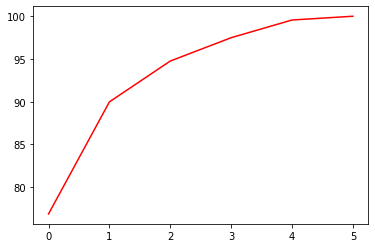

In [15]:
#Plotting cumsm PC wise
plt.plot(var1,color="red")

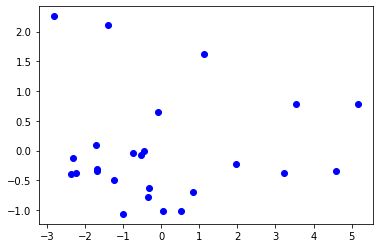

In [16]:
# Taking first 3 PCs
x = np.array(pca_values[:,0])
y = np.array(pca_values[:,1])
z = np.array(pca_values[:,2])

#plot between PC1 and PC2 
plt.plot(x,y,"bo")

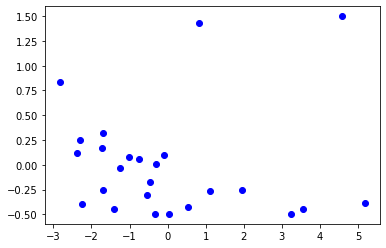

In [17]:
plt.plot(x,z,"bo")

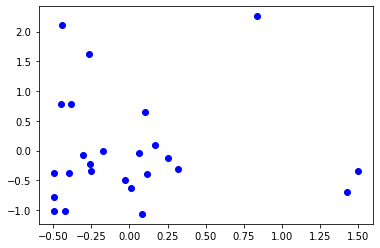

In [18]:
plt.plot(z,y,"bo")

In [19]:
#Creating a new dataset of first few PCs in this case taking first 3
new_df = pd.DataFrame(columns=["X","Y","Z"])
new_df["X"] = pd.Series(x)    
new_df["Y"] = pd.Series(y)   
new_df["Z"] = pd.Series(z)

In [20]:
# Checking the correlation of the PCs in our new dataset

In [21]:
new_df.X.corr(new_df.Y)

3.418088667827672e-17

In [22]:
new_df.X.corr(new_df.Z)

7.764153226697178e-17

In [23]:
new_df.Y.corr(new_df.Z)

5.3156782011547235e-17

In [31]:
new_df = pd.DataFrame(pca_values[:,0:3])

In [32]:
new_df.head()

,0,1,2
0,-1.009874,-1.064310,0.081066
1,-2.822238,2.259045,0.836829
2,1.112466,1.631209,-0.266787
3,-0.741741,-0.042187,0.060501
4,-0.311912,-0.635244,0.010241


In [33]:
#Building the model with k = 3 as this was our best achived value of K which we observe in Kmeans example earlier
kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)
kmeans.labels_

array([0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 2])

In [34]:
md=pd.Series(kmeans.labels_)

In [35]:
uni['clust']=md 

In [36]:
uni = uni.iloc[:,[7,0,1,2,3,4,5,6]]

uni.iloc[:,1:8].groupby(uni.clust).mean()

,clust,SAT,Top10,Accept,SFRatio,Expenses
clust,,,,,,
0,0.0,1273.75,80.583333,36.916667,12.500,24200.916667
1,1.0,1085.20,44.000000,69.600000,18.600,11056.400000
2,2.0,1368.75,90.625000,23.625000,9.375,42375.875000


### Now analyse the result and see whether it is making sense even after reduction in the data as compare to model on full data seen earlier

### Now you can write the results in result variables and share the file with client
### Also you can rebuild the models by splitting the dataset¶